## Final Project Submission

Please fill out:
* Student name: Ben Atkin
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


The goal: Create a model that best predicts house price in the King's County dataset

# Setup notebook

In [70]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

def get_dataframes(regex='.*'):
    """Find all dataframes in global namespace
    
    Excludes stored Jupyter output
    Returns dict with key: value as df_name: df
    """
    dataframe_dict = {}
    for k in globals().keys():
        if (isinstance(eval(k), pd.core.frame.DataFrame) 
            and not k.startswith('_') 
            and re.search(regex, k)):
            dataframe_dict[k] = eval(k)
    return dataframe_dict

def print_df_stats(df_dict,
                   head=True,
                   describe=True, 
                   value_counts=True):
    """Print .info(), .head(), .describe() for dataframes

    use get_dataframes() to get df_dict
    """
    for name, df in df_dict.items():
        print('=' * 100)
        print(name)
        print(df.info(), '\n')
        if head:
            print(df.head(), '\n')
        if describe:
            print(df.describe(include='all'), '\n\n')
        if value_counts:
            for col in df.columns:
                print(f'Value counts for {col}:')
                print(df[col].value_counts(), '\n')

# Import and clean the data

Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [113]:
df = pd.read_csv('kc_house_data.csv')

In [122]:
print_df_stats(get_dataframes('df'))

df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(14)
memory usage: 3.1 MB
None 

           id       date   price  bedrooms  bathrooms  sqft_living  sqft

In [115]:
# Missing values
df.drop('view', axis=1, inplace=True) # View is a useless feature, don't know what it means.
df.drop('yr_renovated', axis=1, inplace=True)
df.waterfront.fillna(0, inplace=True)
sqft_basement_mean = df.sqft_basement.loc[df.sqft_basement != '?'].astype('float').mean()
df.sqft_basement.replace('?', sqft_basement_mean, inplace=True)

# Incorrect dtypes
df.date = pd.to_datetime(df.date)
df.price = df.price.astype('int64')
df.waterfront = df.waterfront.astype('int64')
df.sqft_basement = df.sqft_basement.astype('float').astype('int64')

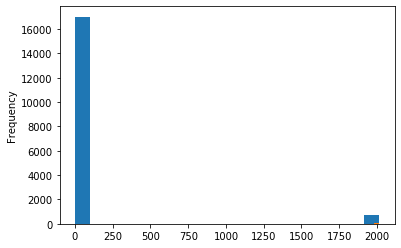

In [78]:
# Deciding whether to drop yr_renovated, almost all the data is 0 or Nan, only ~3% is populated.
df.yr_renovated.plot(kind='hist', bins=20);

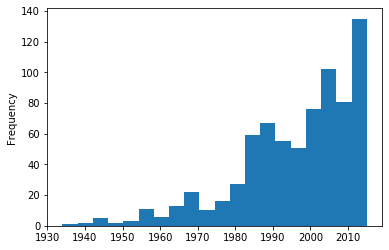

In [79]:
# The distribution of populated yr_renovated feature (Only ~3% of total data)
df.yr_renovated.loc[df.yr_renovated > 0].plot(kind='hist', bins=20);

Because only 3% of the rows have a populated yr_renovated feature, I'm going to drop it. Such a small sample size won't likely result in an accurate coefficient anyway.

# Deal with categorical variables, including dealing with multicollinearity

Which features are categorical first of all?
* condition
* grade

Features that I'll treat as categorical in a later iteration perhaps because they're arguably continuous.
* floors
* bedrooms
* bathrooms

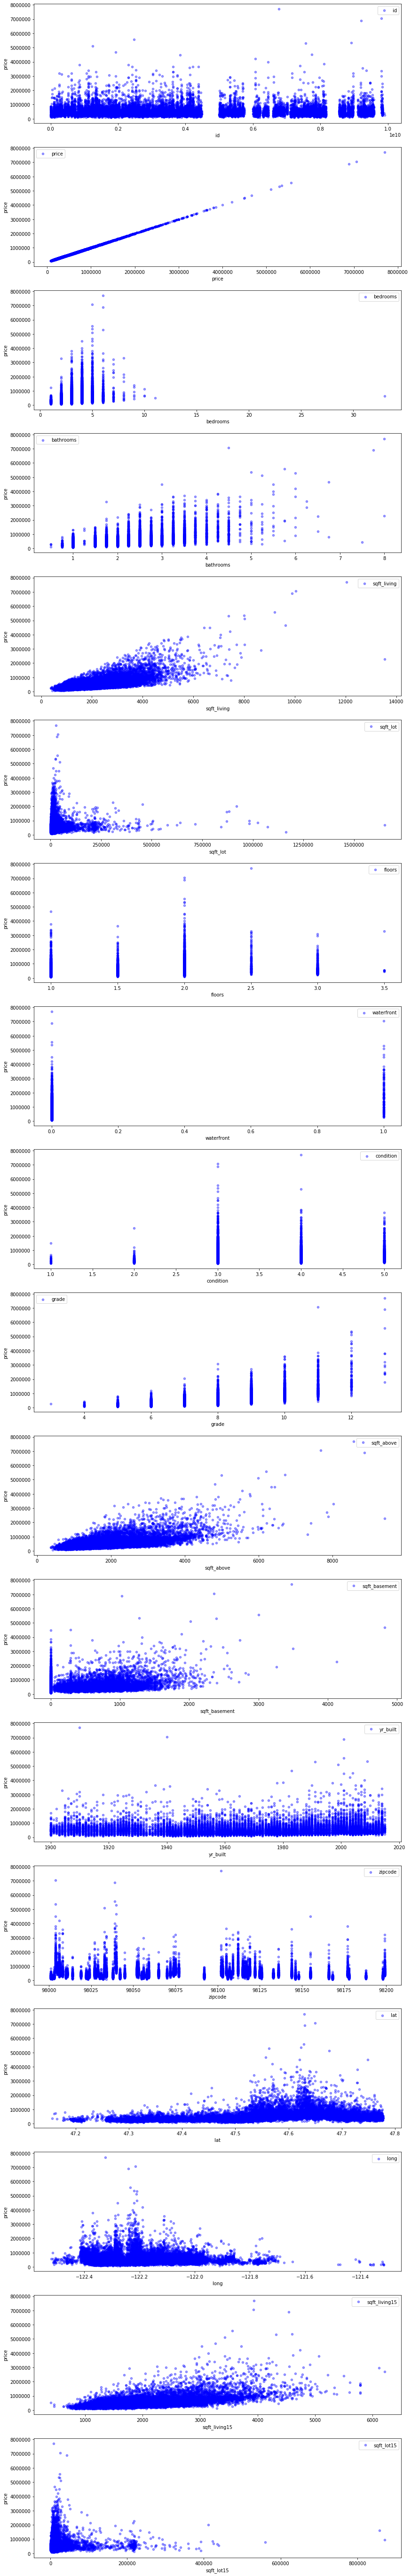

In [154]:
cols = ['id', 
        #'date', 
        'price', 
        'bedrooms', 
        'bathrooms', 
        'sqft_living',
        'sqft_lot', 
        'floors', 
        'waterfront', 
        'condition', 
        'grade', 
        'sqft_above',
        'sqft_basement', 
        'yr_built', 
        'zipcode', 
        'lat', 
        'long',
        'sqft_living15',
       'sqft_lot15'
       ]

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(14,100))
for col, ax in zip(cols, axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b', label=col)

# Check all the assumptions for linear regression

# Get a baseline model with all features

# Remove features that aren't statistically significant, stepwise selection or recursive feature elimination

# Log transform, scale, and/or normalize features

# Detect interactions and deal with them

# Validate the model with k-fold cross validation

# Pickle the model for portability